# 回帰：線形近似から予測する

ボストン住宅価格という有名問題を解きながら、線形回帰の仕組みと概念を学んでいきましょう。

__モジュールの準備__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
try:
    import japanize_matplotlib #日本語化 matplotlib 
    sns.set(font="IPAexGothic") #日本語フォント設定
except ModuleNotFoundError:
    pass

## 線形回帰

線形回帰は、もともと統計学の回帰分析の一種です。説明変数($x_0, x_1, .., x_n$)と目的変数$y$の組が与えられたとき、説明変数と目的変数の関係を表す最もらしい線形関数を求める分析です。

* 単回帰: $y = a x + b$
* 重回帰: $y = a_0 x_0 + a_1 x_1 + .. + a_n x_n + b$

まず、一番シンプルな単回帰で、原理を確認しておきましょう。

<div class="admonition tip">

**例題（単回帰）**

(1,1),(2,3),(4,3),(6,5),(7,4) というデータの組に対して、
最小二乗法を用いて、もっともらしい直線 $y = ax + b$を求めよう。

</div>

まず、データをグラフで見ておきましょう。


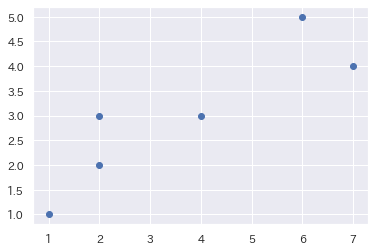

In [2]:
x = np.array([1,2,2,4,6,7])
y = np.array([1,3,2,3,5,4])

plt.scatter(x, y)
plt.show()

ぴっと真ん中に直線が引けるような気がしませんか？

### 最小二乗法

もっともらしい直線の式を $y = a x + b$とおきます。
すると、その直線と点$(x_i, y_i)$とのy方向の誤差は、
$|y_i - a xi - b|$となります。
最小二乗法は、**この誤差の二乗和が最小になるとき、最もらしい直線である**とします。

つまり、次の$E$が最小になるa, bを求めます。

$$
E = \sum ^n _ {i = 1}(ax_i +b - y)^2
$$

<img src="https://mathtrain.jp/wp-content/uploads/2014/12/leastsquare-300x282.png">


### NumPyによる解法

NumPyを使って、最もらしい直線$y = ax+b$を求めてみましょう。

$$
E = \sum ^n _ {i = 1}(ax_i +b - y)^2
$$

先に数学的な準備をしておきます。
$E$の最小値を求めるため、$a,b$の関数とみなし、偏微分します。

$$
 \frac{\partial E}{\partial a} = \sum ^n_{i= 1} 2x_i (ax _i+ b - y_i) = 0 \\
 \frac{\partial E}{\partial b} = \sum ^n_{i= 1}(ax _i+ b - y_i) = 0
$$

実際の式の変形は、[数学がお好きな子](https://ja.wikipedia.org/wiki/%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%97%E6%B3%95)にお任せします。
結論だけ書いておくと、a,bについて整理すると、

$$
a = {\sum ^n _ {i = 1}x_i y_i - {1 \over n}\sum^n_{i = 1}x_i \sum^n_{i = 1}y_i \over \sum^n_{i = 1}x_i^2 - {1 \over n}(\sum^n_{i = 1}x_i)^2} \\
b ={ 1\over n}\sum^n_{i= 1}(y_i - ax_i)　
$$


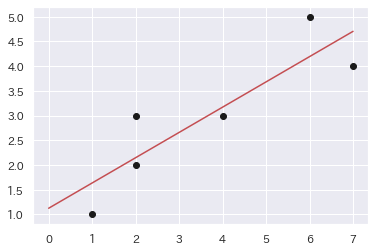

a = 0.5113636363636365 b = 1.1249999999999998


In [3]:
x = np.array([1,2,2,4,6,7])
y = np.array([1,3,2,3,5,4])


def reg1dim(x, y):
    n = len(x)
    a = ((np.dot(x, y)- y.sum() * x.sum()/n) / ((x ** 2).sum() - x.sum()**2 / n))
    b = (y.sum() - a * x.sum())/n
    return a, b

a, b = reg1dim(x, y)
# y2 = a * x2 + b としてプロット
x2 = np.linspace(0, 7, 100)
y2 = a * x2 + b

plt.scatter(x, y, color="k")
plt.plot(x2, y2, color="r")
plt.show()
print("a =", a, "b =", b)


よって、NumPyによって求められた回帰モデルは$y = 0.51 x + 1.12$ となります。

### ライブラリを用いる

線形回帰モデルを計算するアルゴリズムは、
skleran モジュールのLinearRegressionクラスで提供されています。
LinearRegression クラスから、新しいモデルを生成し、$(x,y)$のペアをフィットさせるだけで、
線形回帰モデルを学習することができます。

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = x.reshape(-1, 1) # sklearn 用に変形
model.fit(x, y)

LinearRegression()

線形回帰モデル$y=ax+b$の係数$a$と切片$b$は、それぞれ`model.coef_`と`model.intercept_`で取得できます。


In [5]:
print(model.coef_, model.intercept_)

[0.51136364] 1.1250000000000002


<div class="alert alert-warning">

車輪を再発明しない

原理を理解するため、アルゴリズムを実装することは重要です。
しかし、原理を理解したら、あとはライブラリを使いましょう！

</div>


### 単回帰と重回帰

重回帰分析は、単回帰分析の説明変数を2つ以上に増やしたモデルです。

* 単回帰: $y = a x + b$
* 重回帰: $y = a_0 x_0 + a_1 x_1 + .. + a_n x_n + b$



## ボストン住宅価格

ボストン住宅価格データセットは、米国国勢調査局が収集した情報から抽出＆加工して作成された「1970年代後半における（米国マサチューセッツ州にある）ボストンの住宅価格」の表形式データセットです。データサイエンスや統計処理（線形回帰）の練習データセットとして広く使われています。

__データの入手__
```
!wget https://KuramitsuLab.github.io/data/boston2.csv
```




In [6]:
data = pd.read_csv('boston2.csv')
data.head() # 最初の５行を表示

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


オリジナルのボストン住宅価格データセットは、黒人の居住率など、現在の常識から考えると相応しくないデータが含まれています。本資料では、人工知能の公平性の観点から一部修正したデータを用いています。

含まれる属性は、次の通りです。

* `crim`:	人口1人当たりの犯罪発生数
* `zn`:	25000平方フィート以上の居住区間の占める割合
* `indus`:	小売業以外の商業が占める面積の割合
* `chas`:	チャールズ川によるダミー変数（1：川の周辺，0：それ以外）
* `nox`:	NOxの濃度
* `rm`:	住居の平均部屋数
* `age`:	1940年より前に建てられた物件の割合
* `dis`:	5つのボストン市の雇用施設からの距離
* `rad`:	環状高速道路へのアクセスのしやすさ
* `tax`:	＄10,000ドルあたりの不動産税率の総計
* `ptratio`:	町毎の児童と教師の比率
* `lstat`:	給与の低い職業に従事する人口の割合
* `medv`:	住宅価格 (所有者が占有している家屋の＄1000単位の中央値)

<div class="alert alert-info">

人工知能の公平性（Fairness）

不公平なバイアスに基づき学習した機械学習モデルが不当な差別（人種差別／民族差別や、性別差別、文化差別／地域差別など）を引き起さないように不公平なバイアスを排除すること

</div>


### 重回帰による分析

ボストンハウジング価格では、データセットからいくつかの属性を説明変数として選んで住宅価格(`medv`)を予測する回帰モデルを作成します。

最初の例は、説明変数ひとつの単回帰分析だったため、ここでは２つ以上選んで重回帰分析に挑戦してみます。

<div class="alert alert-info">

Let's try

住宅価格に影響を与えそうな属性（説明変数）をふたつ選んでみよう。

</div>

不動産のプロフェッショナルではありませんから、何が影響するか、わかりません。
とりあえず、僕の経験から `indus`と`lstat`辺りが影響を与えるのではないかと睨んで、
説明変数に選んでみました。

みなさんが、選んだ説明変数に変えて試してみてください。


In [8]:
X = data[['indus', 'lstat']]  # 説明変数
y = data['medv'] # 目的変数
pd.concat([X,y], axis=1).head() #最初の5件のみみてみる

,indus,lstat,medv
0,2.31,4.98,24.0
1,7.07,9.14,21.6
2,7.07,4.03,34.7
3,2.18,2.94,33.4
4,2.18,5.33,36.2


sklearnを用いて、線形回帰モデルを生成します。
説明変数(X)と目的変数(y)を与えると、
最小二乗法によって、線形式に適合(fit)させていきます。

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

説明変数(X)と目的変数(y)から適合された重回帰モデルをみてみましょう。

__重回帰モデル(係数と切片）の確認__

In [10]:
print(model.coef_, model.intercept_)

[-0.08085698 -0.90314706] 34.860869456193264


線形回帰モデルができたか、`indus`と`lstat`の値を適当に与えて、
住宅価格をみてみましょう。

$$
y = -0.08 x_{indus} - 0.9 x_{lstat} + 34.86
$$
 

線形回帰の興味深いところですが、一旦、モデルが構築されると、
モデルの構築に使わなかったデータに対しても、販売価格が予想できるようになります。

In [11]:
model.predict([(3.00, 4.00)])

array([31.00571028])

<div class="alert alert-info">

線形回帰は予測モデル

実は、線形回帰で直線を引くことは、未知の説明変数から目的変数を予測可能にすることになります。
これは、機械学習や人工知能で正に目指していることです。
</div>

## 回帰モデルの評価

モデルはどの程度、正確に予想できるのでしょうか？

学習された重回帰モデルを使って、住宅価格を予測して、実際の住宅価格（正解）と比較してみましょう。

In [12]:
y_pred = model.predict(X)
pd.DataFrame({'正解': y, '予測値':y_pred})


,正解,予測値
0,24.0,30.176417
1,21.6,26.034446
2,34.7,30.649528
3,33.4,32.029349
4,36.2,29.870827
...,...,...
501,22.4,25.162814
502,20.6,25.695670
503,23.9,28.802496
504,22.0,28.043853


数値を比較するだけではわかりにくいので、視覚化してみます。

(0.0, 50.0)

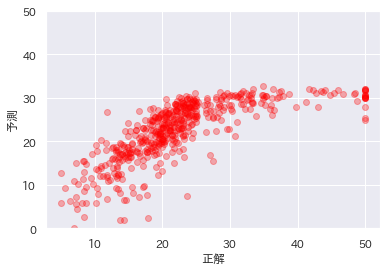

In [13]:
plt.scatter(y, y_pred, c = 'red', alpha=0.3) 
plt.xlabel('正解')
plt.ylabel('予測')
plt.ylim(0, 50)


なんか高価格帯($>30$)がうまく予測できていない気がします。

<div class="alert alert-info">

残差

実測値と予測値の差

</div>

線形回帰モデルとしては、残差が正規分布になっているのが望ましい（らしい）。

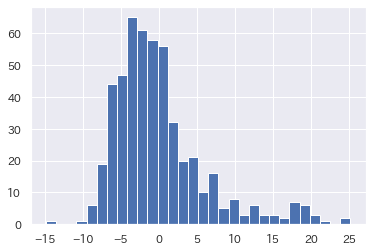

In [14]:
plt.hist(y-y_pred, bins=30)
plt.show() 




### 定量的な評価尺度

回帰モデルを定量的に評価する尺度として、MSEと決定係数がよく使われます。

__MSE__

**平均二乗誤差 (Mean Squared Error)** とは、実際の値と予測値の絶対値の2乗を平均したものです。値が大きいほど誤差の多いモデルと言えます。計算式は以下となります。

$$
MSE(y, \hat{y}) = \frac{1}{n} \sum_{i=0}^{n} (y_i - \hat{y}_i)^2
$$

この式は、最小二乗法に用いた誤差を平均化したものです。小さいほど、もっともらしい直線というのは直感に反しません。ただし、目的変数の分散が大きい場合は、MSEも大きくなります。

sklearn には、`sklearn.metrics.mean_squared_error` に計算用のメソッドが実装されており、以下のように利用できます。


In [15]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y, y_pred) 
print("MSE : ", mse) 

MSE :  38.28783286732932


__R2乗__

決定係数 (R2, R-squared, coefficient of determination) は、MSEを使って、予測モデルの当てはまりの良さを示す指標です。寄与率とも呼ばれます。

$$
R^2(y,\hat{y}) = 1 - \frac{\sum_{i=1}^n (y_i-\hat{y_i})^2 }{\sum_{i=1}^n (y_i-\bar{y})^2},　\\
\mbox{ただし、} \bar{y} = \frac{1}{n} \sum_{i=1}^n y_i
$$

最も当てはまりの良い場合、つまり誤差のない場合、1.0 となります。 (当てはまりの悪い場合、マイナスとなることもあります)。MSEと異なり、目的変数の分散に依存しないため、目的変数のスケールが異なっても一般的な指標となります。


In [16]:
from sklearn.metrics import r2_score
print('R squared error', r2_score(y, y_pred))

R squared error 0.5464577805111691


<div class="alert alert-info">

自由度調整済み決定係数

決定係数をモデルのパラメータ数で調整した指標です。パラメータ数の異なるモデルを比較するのに役立ちます。

```
def adjusted_r2(X,Y,model):
    r_squared = r2_score(Y, model.predict(X))
    adjusted_r2 = 1 - (1-r_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    return adjusted_r2
```
</div>


<div class="alert alert-warning">

汎化性能の評価

機械学習や人工知能では、過去のデータではなく、
未来の**未知のデータ**に対する予測モデルの開発が重要になります。
今回は、既に正解のある過去のデータに対する予測性能を評価しているだけです。
次回、**ホールドアウト法**という未知のデータに対する汎化性能を評価する手法を紹介します。

</div>


## 仮説検証

データサイエンスの目的のひとつは、仮説検証によるより精度の高い予測モデルを作成することです。

ボストン住宅価格データセットには、部屋数や犯罪率など色々なデータが入っています。
データを傍観するときは、色々な仮説を立てながらみるようにしましょう。

__例__

* 部屋の数が増えると価格上がりそうだな..
* 犯罪率が高いと住宅価格は下がりそうだな..
* 環境汚染は住民にはわかりにくいので、住宅価格に影響しないだろうなど

このような仮説を立てて、仮説検証をするのはデータ分析の醍醐味です。

データ分析と可視化を駆使して、住宅価格に影響を与える説明変数を分析していきます。

<div class="alert alert-info">
Let's try

パラメータを直して自分なりに分析してみましょう。
</div>



### 目的変数の分布を見る

まずは、目的変数の分布を見るのが良いでしょう。


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medv', ylabel='Density'>

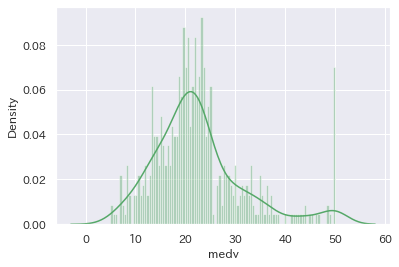

In [17]:
sns.distplot(data['medv'], color='g', bins=100, hist_kws={'alpha': 0.4})

array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'lstat'}>],
       [<AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

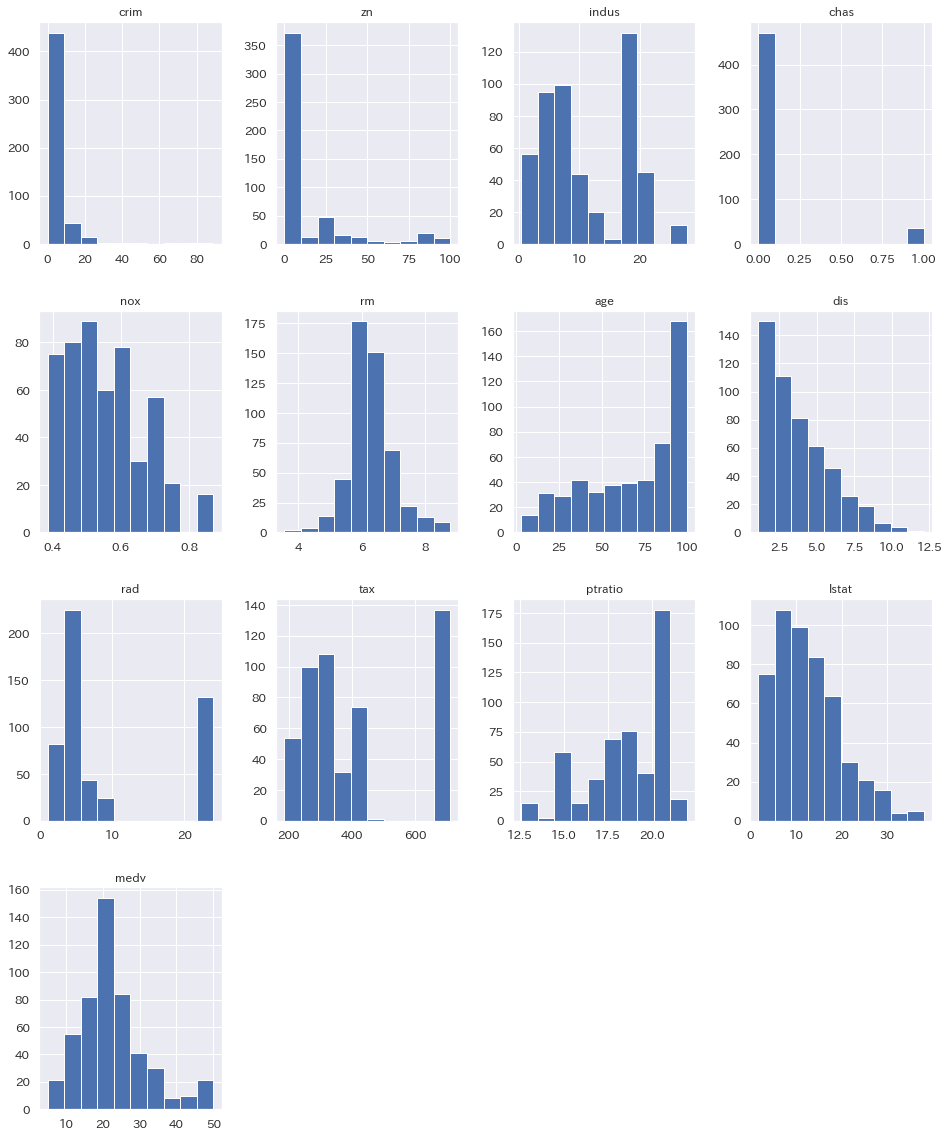

In [18]:
data.hist(figsize=(16, 20),xlabelsize=12, ylabelsize=12)

<div class="alert alert-warning">

目的変数の正規分布でない!!

統計学をしっかり学んでいないと、困ったことになります。

https://toukeier.hatenablog.com/entry/2019/09/08/224346

</div>


### ポイント(2): 相関を調べる

説明変数の候補を調べるときにヒントとなるのが、目的変数との相関です。

__仮説:「犯罪率が高ければ住宅価格が低くなりそうだな」__


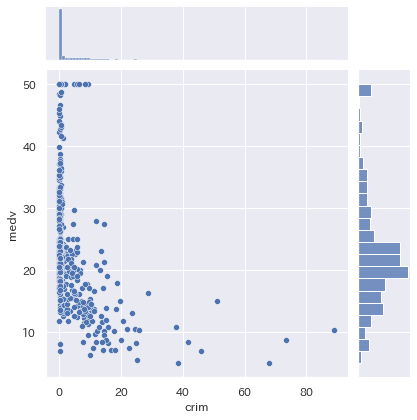

In [19]:
sns.jointplot(x="crim",y="medv",data=data)

昔の`jointplot`は、ピアソン相関係数とp値を計算してくれて表示くれました。（今は、便利な機能は廃止になって表示してくれません。）代わりに、`scipy.stat`を使って計算することができます。

In [20]:
from scipy.stats import pearsonr
corr = pearsonr(data['crim'], data['medv'])
print('ピアソン相関係数:', corr[0])
print('p値:', corr[1])


ピアソン相関係数: -0.38830460858681154
p値: 1.1739870821941207e-19



<!--
ピアソンの相関係数だけではなく、帰無仮説(無相関)と設定した場合のp値も計算してくれるっぽいです。すばらしいですね。
-->

<div class="alert alert-info">

p値 : 有意確率

p値は 0 に近いほどデータが偶然にそうなった可能性が低い。
一般に、p 値は 0.05 (5%) 未満のとき、偶然ではないといえる。

</div>

__仮説(2): 部屋数が多いほど価格が高くなりそうだな__

ピアソン相関係数: 0.6953599470715394
p値: 2.4872288710071593e-74


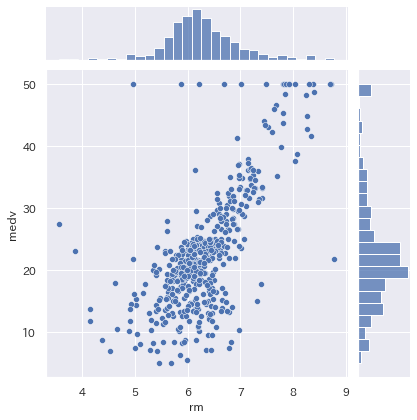

In [21]:
sns.jointplot(x='rm', y='medv', data=data)
corr = pearsonr(data['rm'], data['medv'])
print('ピアソン相関係数:', corr[0])
print('p値:', corr[1])


__仮説(3) NOx は住宅価格に影響ない__ (カーネル図)

ピアソン相関係数: -0.42732077237328253
p値: 7.065041586251507e-24


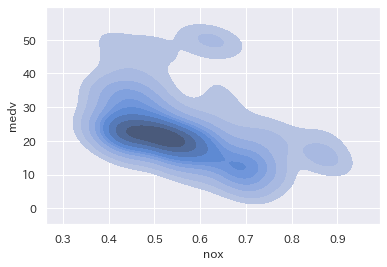

In [22]:
sns.kdeplot(data=data, x="nox", y="medv", shade=True, thresh=0.05)
corr = pearsonr(data['nox'], data['medv'])
print('ピアソン相関係数:', corr[0])
print('p値:', corr[1])

めんどくさいので、全部見てみましょう！

<AxesSubplot:>

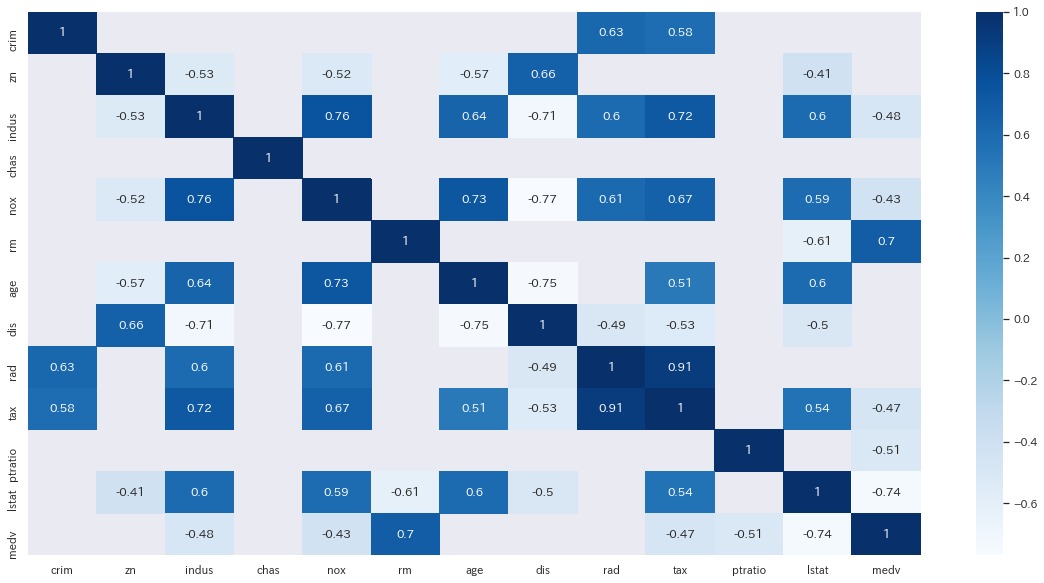

In [23]:
cor=data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor[(cor >= 0.5) | (cor <= -0.4)],annot=True,cmap='Blues')

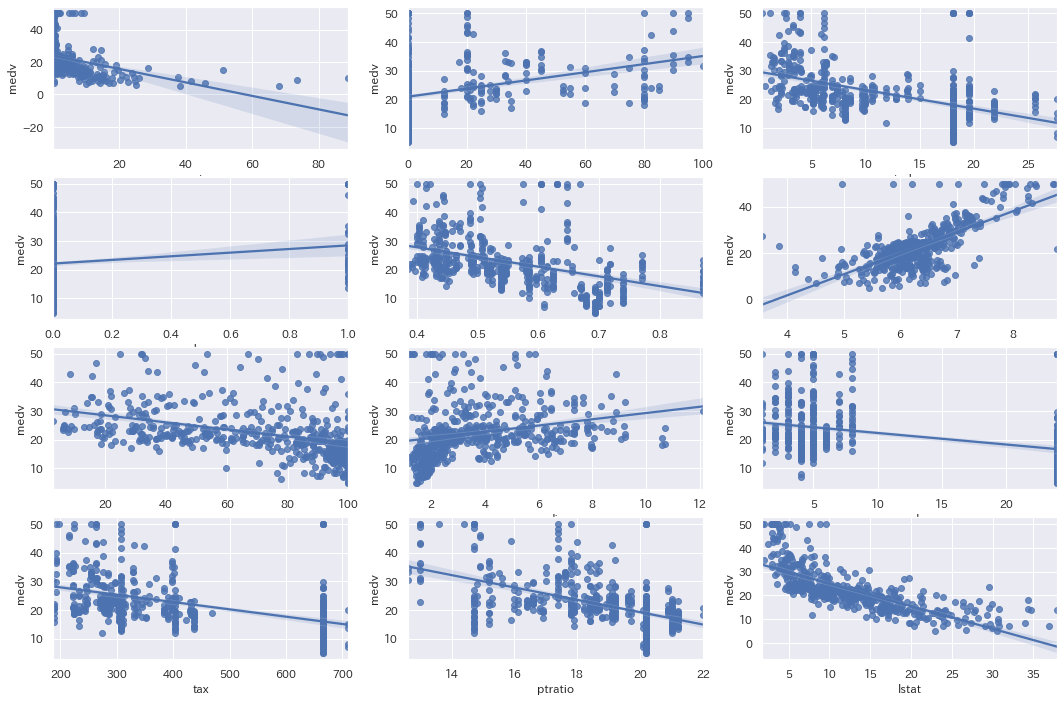

In [24]:
fig, ax = plt.subplots(round(len(data.columns) / 3), 3, figsize = (18, 12))
for i, ax in enumerate(fig.axes):
    if i < len(data.columns) - 1:
        sns.regplot(x=data.columns[i],y='medv',data=data[data.columns], ax=ax)

### 全てのパラメータを説明変数

重回帰分析は、複数の説明変数を扱うことができるので、とりあえず全変数を説明変数にして、不要な説明変数を落としていく方法もあります。

<!--
https://www.kaggle.com/emilytries/regression-algorithm-approaches-in-boston-dataset
https://hinomaruc.hatenablog.com/entry/2019/11/15/223628
-->


In [25]:
y = data['medv']
X = data.drop('medv', axis=1) # medvを落とす

Mean Square Error :  22.429681439489933
R squared error 0.7343070437613075


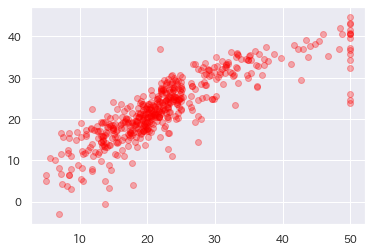

In [26]:
model=LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
plt.scatter(y, y_pred, c = 'red', alpha=0.3) 
print("Mean Square Error : ", mean_squared_error(y, y_pred) ) 
print('R squared error', r2_score(y, y_pred))

説明変数を全て入れると、一見、最もよい回帰モデルが作れそうですが、**多重共線性(multi-colinearlity、和製英語: マルチコ)**が生じることがあります。例えば、説明変数に$x$と$x^2$のように、$x$が大きくなると、$x^2$も大きくなる変数が入っていると、マルチコが発生します。

マルチコへの対応は分野によって異なります。

* 統計学的には、放置してはいけない
* 機械学習的には、モデルの説明力を低下させるものの、予測精度にあまり影響を与えない




## コースワーク

<div class="admonition tip">

**例題（ボストンハウジング）**

1. 最も精度（決定係数）が高くなる３つの説明変数の組み合わせを探してみよう (`0.65`は超えるはずです。)
2. 最も精度（決定係数）が高くなる４つ以上の説明変数の組み合わせを選んでみよう
3. （もし余力があって、機械学習の世界観を広げたいのなら）ランダムフォレストやXGBoostを調べて、重回帰モデルと精度を比較してみよう

__予習できる場合__：次回に習うホールドアウト法を用いて、70:30で訓練データとテストデータを使ってモデルを評価してみるといいです。
</div>



### (補足）ランダムフォレストとは

今回は、データ分析の基礎中の基礎なので、線形回帰（単回帰と重回帰）を紹介しました。
しかし、機械学習アルゴリズムは長足の進歩を遂げているので、
回帰で予測モデルを作りたいのなら、線形回帰に強くこだわる必要はありません。

ボストン住宅価格データセットも、
決定木と乱択アルゴリズムを組み合わせた**ランダムフォレスト**を用いると、
素晴らしくよい予測モデルが得られます。



Mean Square Error :  1.464894106719366
R squared error 0.9826474554780945


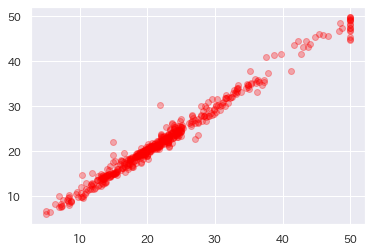

In [27]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y) 
y_pred = model.predict(X)
plt.scatter(y, y_pred, c = 'red', alpha=0.3) 
print("Mean Square Error : ", mean_squared_error(y, y_pred) ) 
print('R squared error', r2_score(y, y_pred))


__（3. のヒント）__

勾配ブーストを用いた決定木(GBDT)によるクラス分類や回帰はデータ分析コンペでも非常によく使われています。


https://arxiv.org/abs/1603.02754

その中でも2016年に出されたXGBoostはLightGBMと並びよく使われている手法です。

```
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train,y_train) 

#xgb.plot_importance(model)
#xgb.to_graphviz(model, num_trees=5)
```

<div class="alert alert-info">

Let's try

どのような機械学習アルゴリズムがあるか調べてみよう。
データサイエンティストになるには、
最新アルゴリズムに関心をもち、
データセットにあわせて使い分けることも重要です。
研究室の学生をみていると、最新のアルゴリズムを試してきて、
色々、報告してくれます。教員より詳しいです。
</div>
